<div align="left" style="background-color: #008080; padding: 20px 10px;">
<h3><b>IDEAS - Institute of Data Engineering, Analytics and Science Foundation</b></h3>
<p>Spring Internship Program 2026</p>
<hr style="width:100%;">
<h3><b>Project Title:</b> Time-Series Analysis of Global Temperature Data</h3>
<h4>Project Notebook</h4>

<blockquote style="border-left: 4px solid #4285F4; padding-left: 15px;">
  <strong>Created by:</strong> Samyabrata Roy<br>
  <strong>Designation:</strong> Associate Software Developer
</blockquote>
<hr style="width:100%;">
</div>

### Question 1: Import Libraries and Load Data (5 Marks)

Import `pandas` as `pd` and `numpy` as `np`. Download the global temperature dataset `monthly_csv.csv` from https://drive.google.com/drive/folders/1TeLp4U4NsXCSgClbF7ODBsaLKpHSWeQr?usp=sharing and load into a pandas DataFrame called `df_temp`. Display the first 5 rows.

**Hint:** Use `pd.read_csv()` and `.head()`.

**Expected Output:**
```
    Source        Date    Mean
0     GCAG  2016-12-06  0.7895
1  GISTEMP  2016-12-06  0.8100
2     GCAG  2016-11-06  0.7504
3  GISTEMP  2016-11-06  0.9300
4     GCAG  2016-10-06  0.7292
```

In [1]:
# Write your answer here
import numpy as np
import pandas as pd

# Correcting the URL to a direct download link for Google Drive
# The file ID is '1IxuRnoAfV-LNVcpCt0Ya2CDsOP_tMhuz'
df_temp = pd.read_csv('https://drive.google.com/uc?export=download&id=1IxuRnoAfV-LNVcpCt0Ya2CDsOP_tMhuz')

print(df_temp.head())

    Source        Date    Mean
0     GCAG  2016-12-06  0.7895
1  GISTEMP  2016-12-06  0.8100
2     GCAG  2016-11-06  0.7504
3  GISTEMP  2016-11-06  0.9300
4     GCAG  2016-10-06  0.7292


### Question 2: Convert to Datetime and Sort (5 Marks)

The 'Date' column is currently a string. Convert it to a proper datetime object and then sort the entire DataFrame `df_temp` by this 'Date' column in ascending order. Display the head of the sorted DataFrame.

**Hint:** Use `pd.to_datetime()` for conversion and `.sort_values(by='Date')` for sorting.

**Expected Output:** A table showing the first 5 rows of the dataset, now sorted by date starting from the earliest records.

In [2]:
# Write your answer here
df_temp['Date'] = pd.to_datetime(df_temp['Date'])
df_temp = df_temp.sort_values(by='Date')
print(df_temp.head())

       Source       Date    Mean
3287  GISTEMP 1880-01-06 -0.3000
3286     GCAG 1880-01-06  0.0009
3284     GCAG 1880-02-06 -0.1229
3285  GISTEMP 1880-02-06 -0.2100
3282     GCAG 1880-03-06 -0.1357


### Question 3: Data Inspection (5 Marks)

Get a quick overview of your sorted DataFrame. Print the shape and then check for the total number of missing (null) values across the entire DataFrame.

**Hint:** Use `df_temp.shape` to get the dimensions and `df_temp.isnull().sum().sum()` to count all missing values.

**Expected Output:** The shape of the DataFrame and the total count of null values.

In [3]:
# Write your answer here
print(df_temp.shape)
print(df_temp.isnull().sum().sum())

(3288, 3)
0


### Question 4: Extract Year and Month (10 Marks)

Create two new columns in `df_temp`: 'Year' and 'Month'. These should contain the year and month numbers extracted from the 'Date' column. Display the head of the DataFrame to show these new columns.

**Hint:** After converting to datetime, you can access the year with `.dt.year` and the month with `.dt.month` on the 'Date' column.

**Expected Output:** The first 5 rows of the DataFrame, now including 'Year' and 'Month' columns.

In [4]:
# Write your answer here
df_temp['Year'] = df_temp['Date'].dt.year
df_temp['Month'] = df_temp['Date'].dt.month
print(df_temp.head())

       Source       Date    Mean  Year  Month
3287  GISTEMP 1880-01-06 -0.3000  1880      1
3286     GCAG 1880-01-06  0.0009  1880      1
3284     GCAG 1880-02-06 -0.1229  1880      2
3285  GISTEMP 1880-02-06 -0.2100  1880      2
3282     GCAG 1880-03-06 -0.1357  1880      3


# **Exploratory Data Analysis**


In [5]:
#Data Overview
print(df_temp.info())
print(df_temp.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 3288 entries, 3287 to 0
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Source  3288 non-null   object        
 1   Date    3288 non-null   datetime64[ns]
 2   Mean    3288 non-null   float64       
 3   Year    3288 non-null   int32         
 4   Month   3288 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(1)
memory usage: 128.4+ KB
None
                                Date         Mean         Year        Month
count                           3288  3288.000000  3288.000000  3288.000000
mean   1948-06-21 05:34:35.912408832     0.036588  1948.000000     6.500000
min              1880-01-06 00:00:00    -0.780000  1880.000000     1.000000
25%              1914-03-29 06:00:00    -0.208150  1914.000000     3.750000
50%              1948-06-21 00:00:00    -0.036600  1948.000000     6.500000
75%              1982-09-13 12:00:00     0.2400

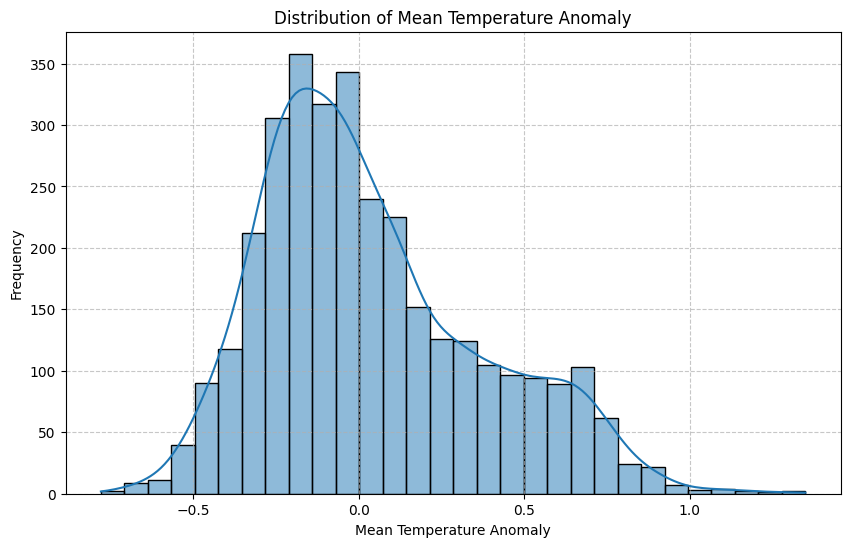

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
#Temparature Distribution Plot
plt.figure(figsize=(10, 6))
sns.histplot(df_temp['Mean'], kde=True, bins=30)
plt.title('Distribution of Mean Temperature Anomaly')
plt.xlabel('Mean Temperature Anomaly')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

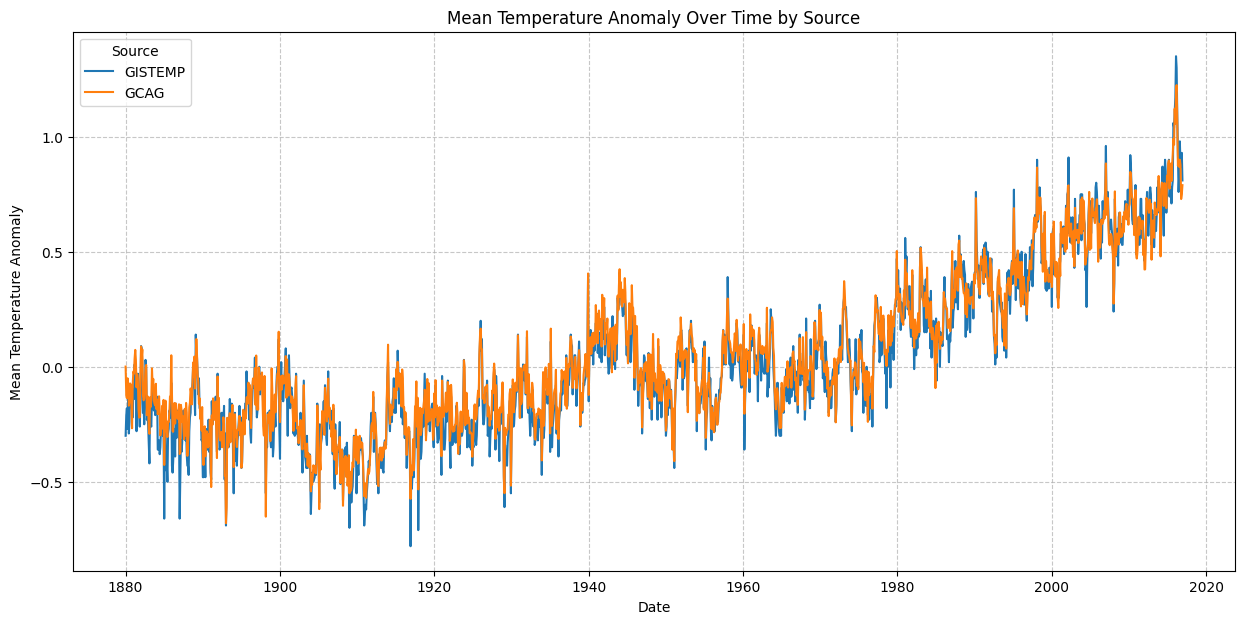

In [7]:
#Time Series Trend Plot
plt.figure(figsize=(15, 7))
sns.lineplot(data=df_temp, x='Date', y='Mean', hue='Source')
plt.title('Mean Temperature Anomaly Over Time by Source')
plt.xlabel('Date')
plt.ylabel('Mean Temperature Anomaly')
plt.legend(title='Source')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

/tmp/ipython-input-3066651425.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg_temp.index, y=monthly_avg_temp.values, palette='viridis')


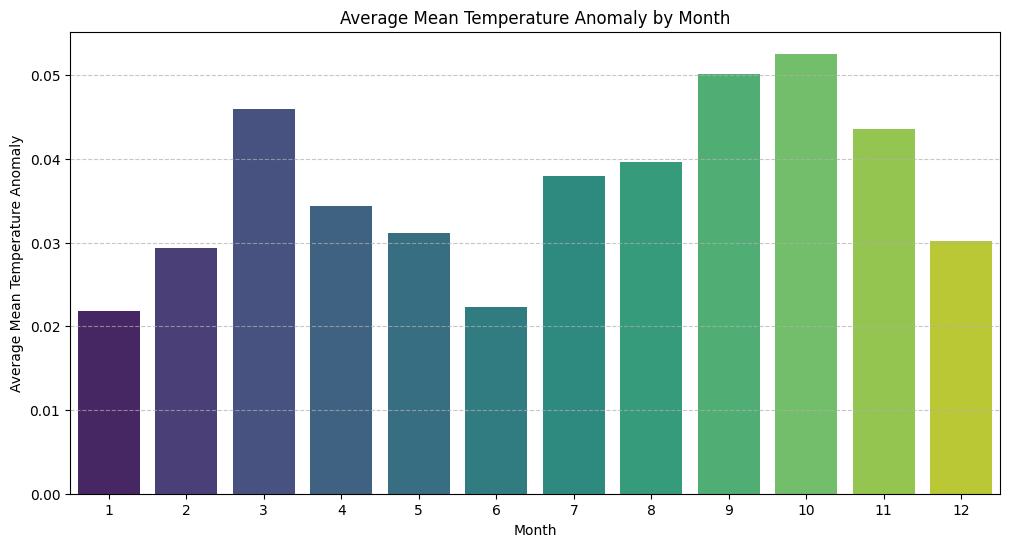

In [8]:
#monthly seasonality plot
monthly_avg_temp = df_temp.groupby('Month')['Mean'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_avg_temp.index, y=monthly_avg_temp.values, palette='viridis')
plt.title('Average Mean Temperature Anomaly by Month')
plt.xlabel('Month')
plt.ylabel('Average Mean Temperature Anomaly')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

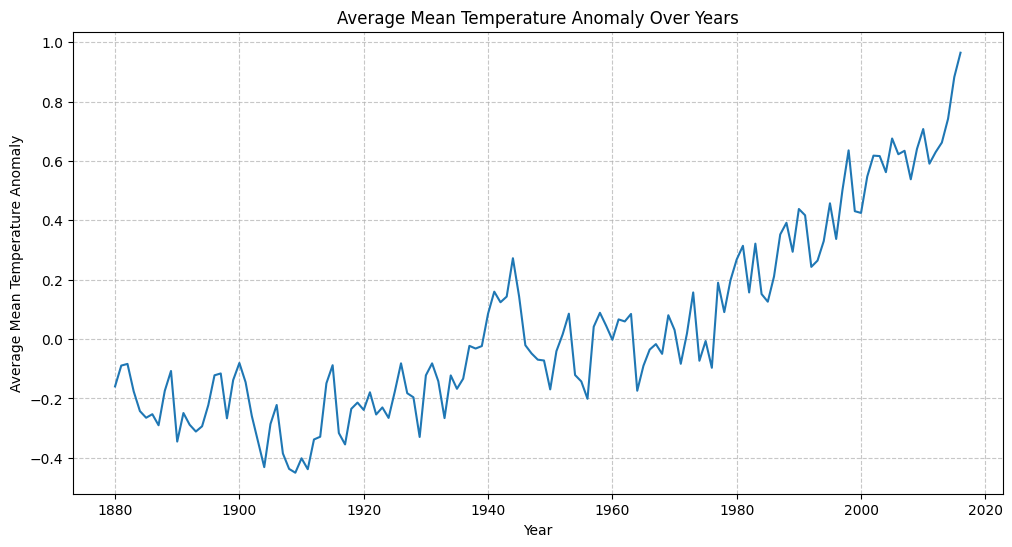

In [9]:
#yearly trend plot
yearly_avg_temp = df_temp.groupby('Year')['Mean'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_avg_temp.index, y=yearly_avg_temp.values)
plt.title('Average Mean Temperature Anomaly Over Years')
plt.xlabel('Year')
plt.ylabel('Average Mean Temperature Anomaly')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Question 5: Calculate 12-Month Moving Average (10 Marks)

Calculate the 12-month moving average of the 'Mean' temperature for each 'Source'. Store this in a new column named `Moving_Avg`. Display the last 5 rows of the DataFrame.

**Hint:** Use `.groupby('Source')['Mean'].transform(lambda x: x.rolling(window=12, min_periods=1).mean())`. Use `.tail()` to see the last rows.

**Expected Output:** A table showing the last 5 rows of the DataFrame with the new 'Moving_Avg' column.

In [10]:
# Write your answer here
df_temp['Moving_Avg'] = df_temp.groupby('Source')['Mean'].transform(lambda x: x.rolling(window=12, min_periods=1).mean())
print(df_temp.tail())

    Source       Date    Mean  Year  Month  Moving_Avg
4     GCAG 2016-10-06  0.7292  2016     10    0.981917
3  GISTEMP 2016-11-06  0.9300  2016     11    1.017500
2     GCAG 2016-11-06  0.7504  2016     11    0.963992
1  GISTEMP 2016-12-06  0.8100  2016     12    0.992500
0     GCAG 2016-12-06  0.7895  2016     12    0.936292


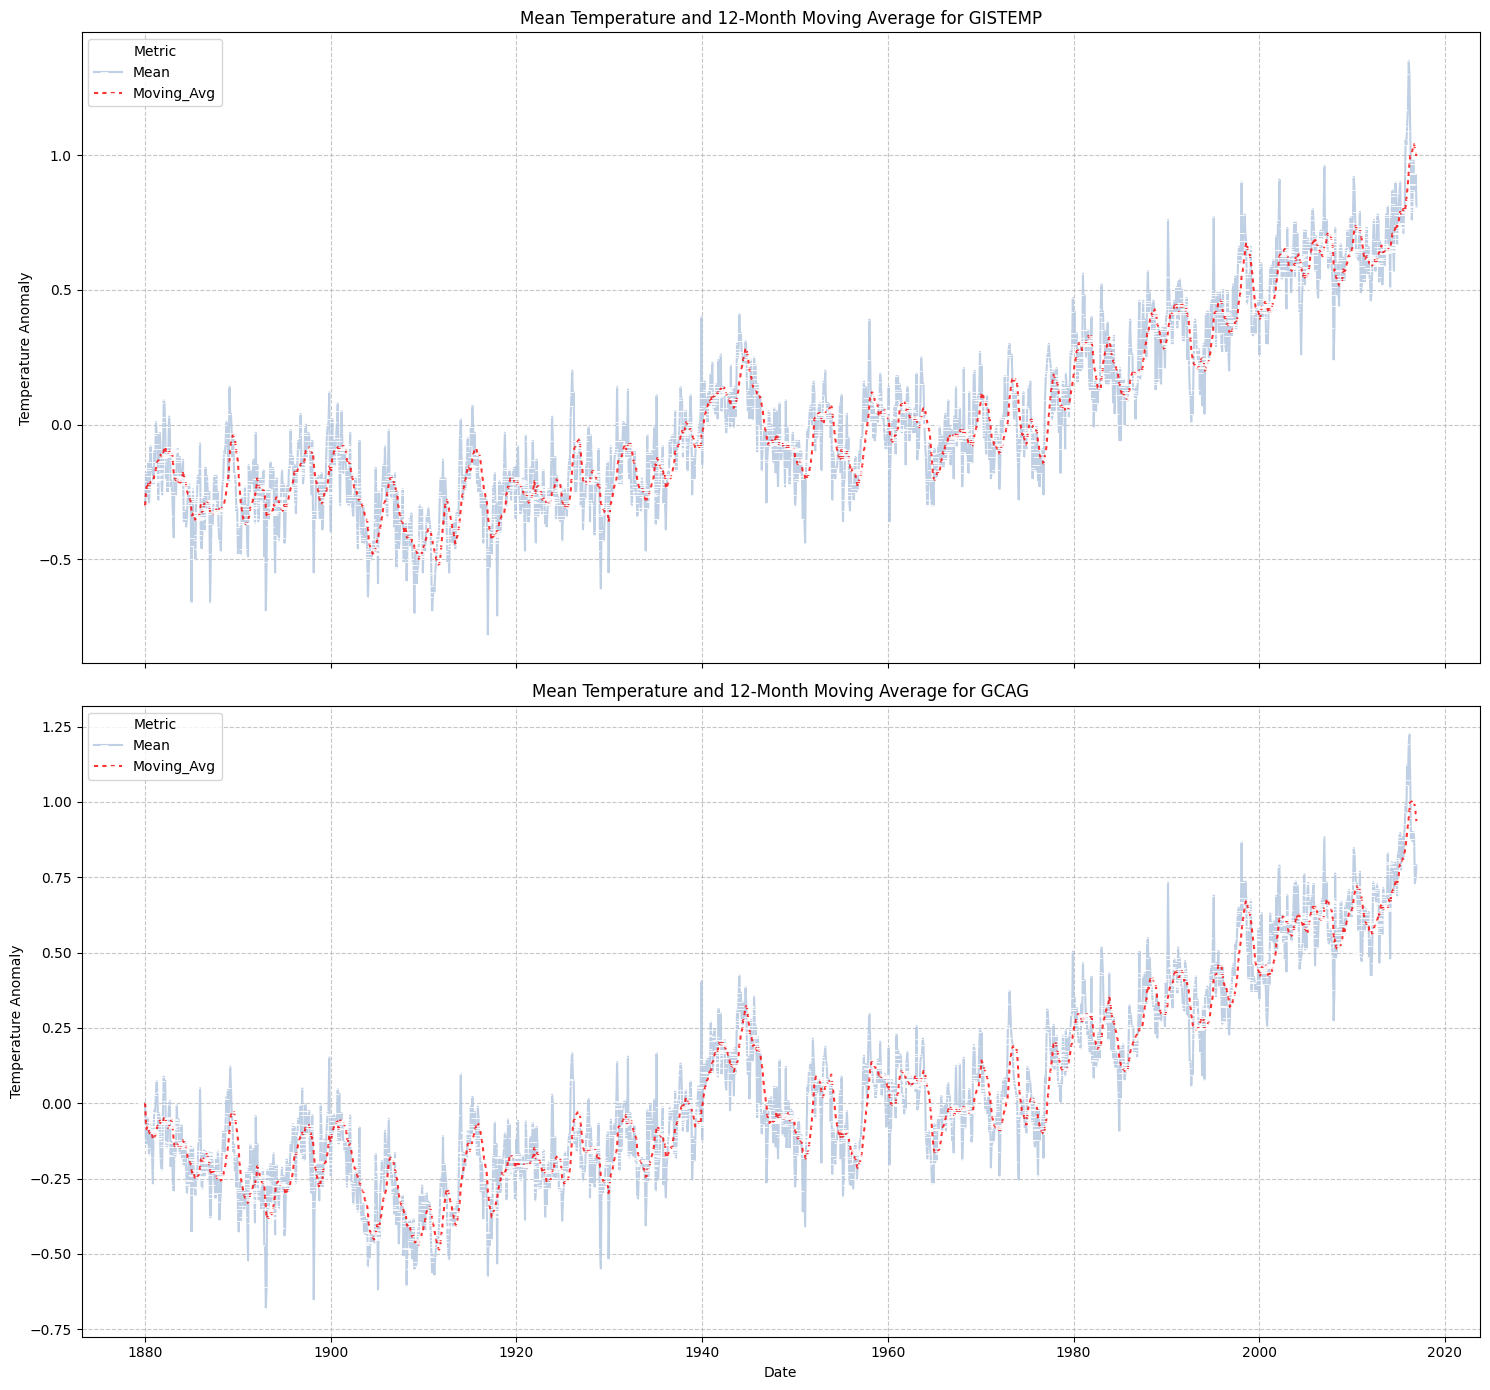

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots for each source
fig, axes = plt.subplots(nrows=len(df_temp['Source'].unique()), ncols=1, figsize=(15, 7 * len(df_temp['Source'].unique())), sharex=True)

# Flatten axes array if there's only one row
if len(df_temp['Source'].unique()) == 1:
    axes = [axes]

for i, source in enumerate(df_temp['Source'].unique()):
    # Filter data for the current source
    df_source = df_melted[df_melted['Source'] == source]

    # Plot on the corresponding subplot with specific marker and color adjustments
    sns.lineplot(data=df_source, x='Date', y='Value', hue='Metric', style='Metric',
                 palette={'Mean': 'lightsteelblue', 'Moving_Avg': 'red'},
                 linewidth=1.5, alpha=0.8, dashes={'Mean': '', 'Moving_Avg': (2, 2)},
                 markers={'Mean': False, 'Moving_Avg': True}, markersize=6, ax=axes[i]) # Changed markersize to a single float

    axes[i].set_title(f'Mean Temperature and 12-Month Moving Average for {source}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Temperature Anomaly')
    axes[i].grid(True, linestyle='--', alpha=0.7)
    axes[i].legend(title='Metric')

plt.tight_layout()
plt.show()

### Question 6: Filter for the Last 20 Years (10 Marks)

Create a new DataFrame called `df_last20` by filtering `df_temp` to include only data from the last 20 years (inclusive of the latest year in the data). Print the shape of this new DataFrame.

**Hint:** First, find the latest year using `df_temp['Year'].max()`. Then, filter the DataFrame where 'Year' is greater than or equal to `latest_year - 19`.

**Expected Output:** A tuple representing the shape of the filtered `df_last20` DataFrame.

In [12]:
# Write your answer here
latest_year = df_temp['Year'].max()
df_last20 = df_temp[df_temp['Year'] >= latest_year - 19]
print(df_last20.shape)


(480, 6)


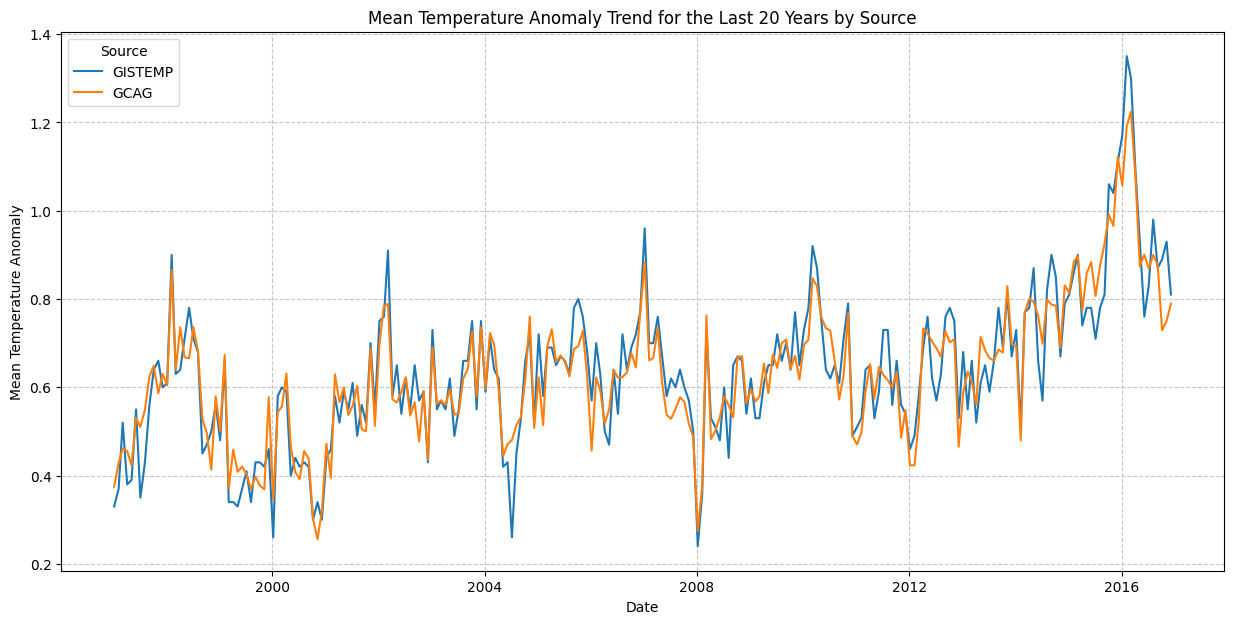

In [13]:
latest_year = df_temp['Year'].max()
df_last20 = df_temp[df_temp['Year'] >= latest_year - 19]

plt.figure(figsize=(15, 7))
sns.lineplot(data=df_last20, x='Date', y='Mean', hue='Source')
plt.title('Mean Temperature Anomaly Trend for the Last 20 Years by Source')
plt.xlabel('Date')
plt.ylabel('Mean Temperature Anomaly')
plt.legend(title='Source')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Question 7: Group by Source (10 Marks)

Group the original `df_temp` DataFrame by the 'Source' column and calculate the mean of the 'Mean' temperature for each source. Display the resulting Series.

**Hint:** Use the `.groupby('Source')['Mean'].mean()` method.

**Expected Output:** A Pandas Series showing the two sources (GCAG, GISTEMP) as the index and their overall average mean temperature as the values.

In [14]:
# Write your answer here
print(df_temp.groupby('Source')['Mean'].mean())
avg_mean_by_source = df_temp.groupby('Source')['Mean'].mean()

Source
GCAG       0.048797
GISTEMP    0.024380
Name: Mean, dtype: float64


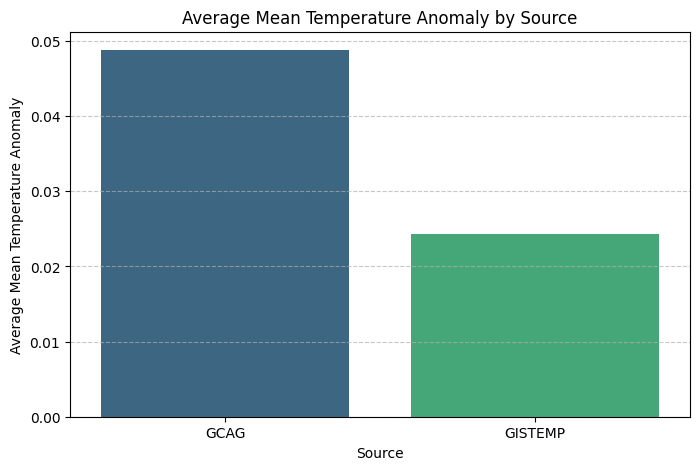

In [15]:
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_mean_by_source.index, y=avg_mean_by_source.values, palette='viridis', hue=avg_mean_by_source.index, legend=False)
plt.title('Average Mean Temperature Anomaly by Source')
plt.xlabel('Source')
plt.ylabel('Average Mean Temperature Anomaly')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Question 8: Aggregate by Year (15 Marks)

Group the `df_temp` DataFrame by 'Year' and calculate the average 'Mean' temperature for each year. Display the last 5 entries of this yearly aggregation.

**Hint:** Use `.groupby('Year')['Mean'].mean()` and then `.tail()` on the result.

**Expected Output:** A Series showing the last 5 years in the dataset and their corresponding average mean temperatures.

In [16]:
# Write your answer here
print(df_temp.groupby('Year')['Mean'].mean().tail())

Year
2012    0.629517
2013    0.661846
2014    0.742075
2015    0.882408
2016    0.964396
Name: Mean, dtype: float64


### Question 9: Find the Hottest Month on Average (15 Marks)

Across all years in the `df_temp` dataset, find which month has the highest average 'Mean' temperature. Print the resulting Series which shows the average temperature for each month.

**Hint:** Use `.groupby('Month')['Mean'].mean()`.

**Expected Output:** A Series with month numbers (1-12) as the index and their corresponding average mean temperatures.

In [17]:
# Write your answer here
print(df_temp.groupby('Month')['Mean'].mean())

Month
1     0.021871
2     0.029409
3     0.045972
4     0.034341
5     0.031106
6     0.022287
7     0.037955
8     0.039577
9     0.050192
10    0.052566
11    0.043543
12    0.030244
Name: Mean, dtype: float64


### Question 10: Create a Pivot Table (15 Marks)

Using the `df_last20` DataFrame, create a pivot table to show the average 'Mean' temperature for each 'Month' across each 'Year'. Fill any missing values with 0. Display the resulting pivot table.

**Hint:** Use `df_last20.pivot_table(index='Year', columns='Month', values='Mean', fill_value=0)`.

**Expected Output:** A table with years as rows, months (1-12) as columns, and the average mean temperature as the values.

In [18]:
# Write your answer here
pivot_table = df_last20.pivot_table(index='Year', columns='Month', values='Mean', fill_value=0)
print(pivot_table)

Month       1        2        3        4        5        6        7        8   \
Year                                                                            
1997   0.35230  0.39940  0.49085  0.41755  0.40675  0.54040  0.43005  0.48955   
1998   0.60710  0.88300  0.63480  0.68790  0.68895  0.72285  0.72290  0.68080   
1999   0.49035  0.66665  0.35510  0.39950  0.36930  0.39515  0.40645  0.35475   
2000   0.30335  0.56195  0.57805  0.61055  0.43285  0.42380  0.40595  0.44285   
2001   0.45600  0.42730  0.60465  0.54330  0.59485  0.54365  0.58430  0.54660   
2002   0.72310  0.77230  0.84935  0.57625  0.60780  0.56450  0.62145  0.54295   
2003   0.71035  0.55630  0.57010  0.55505  0.60770  0.51405  0.54540  0.64010   
2004   0.59395  0.71660  0.66820  0.60700  0.43210  0.45035  0.37030  0.48205   
2005   0.67115  0.54715  0.69090  0.71070  0.65365  0.67110  0.65860  0.62735   
2006   0.51335  0.66105  0.61155  0.50885  0.50995  0.63995  0.58090  0.67155   
2007   0.92195  0.68045  0.6

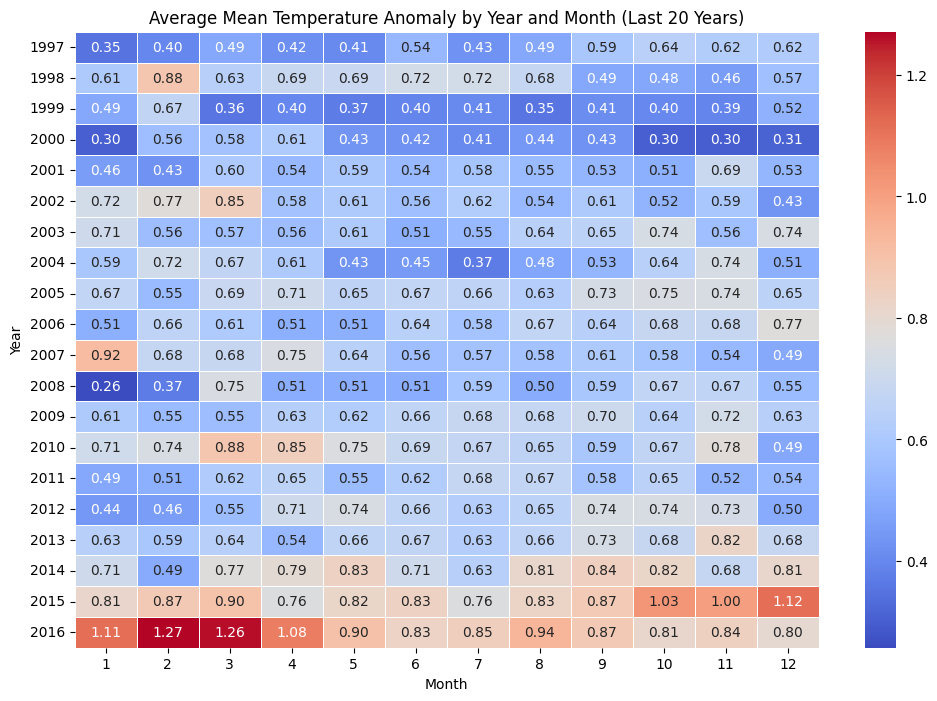

In [19]:
latest_year = df_temp['Year'].max()
df_last20 = df_temp[df_temp['Year'] >= latest_year - 19]
pivot_table = df_last20.pivot_table(index='Year', columns='Month', values='Mean', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Average Mean Temperature Anomaly by Year and Month (Last 20 Years)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()